1. Écrire un programme qui permet de transformer le fichier examens.xlsx en DataFrame.

In [1]:
# pip install pyqrcode
# pip install pypng
# from pyqrcode
#x = pd.crosstab(resultat['sexe'],resultat['']

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xlwings as result

In [3]:
deliberation=pd.ExcelFile("examens.xlsx", engine='openpyxl')
# Affichage des noms de feuilles
print(deliberation.sheet_names)
# Chargement d'une feuille de calcul dans le DataFrame sous le nom de "etud1"
resultat = deliberation.parse("Resultats")
resultat

['Resultats']


,Nom,Prénom,Physique 1,Physique 2,TP Physique,Maths 1,Maths 2,Chimie 1,Chimie 2,TP Chimie,Info 1,Info 2,Base 1,Base 2,Base 3,Graphique 1,Graphique 2
0,DIALLO,Ibrahima,18.100,14.300,13,13.600,15.800,14.0,11.5,16.00,16.0,15.2,14.40,10,17,10.4,10
1,BA,Souleymane,19.700,17.600,16,16.000,19.000,16.6,16.8,0.00,20.0,20.0,16.00,12,16,15.6,18
2,BEYE,Alioune,4.750,4.300,10,8.602,11.400,5.4,8.4,6.00,2.8,6.1,8.40,7,11,15.6,11
3,BIAYE,Babacar,15.200,10.600,16,15.100,15.000,18.6,8.2,8.00,15.8,14.8,14.40,11,13,9.4,14
4,BALDE,Mamadou,4.700,7.100,15,13.150,16.000,10.6,11.0,16.00,7.2,14.9,13.40,8,12,14.8,15
5,CAMARA,Khadidiatou,13.700,11.100,10,10.252,9.752,9.4,12.9,20.00,8.8,7.6,11.60,7,15,8.2,7
6,CISSE,Awa,16.500,15.600,13,16.450,14.600,15.8,10.3,6.00,17.0,16.1,14.80,10,12,13.6,10
7,CISSE,Ousmane,15.100,6.700,10,12.800,13.400,12.6,8.7,19.00,9.6,10.4,14.80,8,14,4.8,12
8,DIAGNE,Marie,17.250,14.700,15,16.900,16.900,13.0,16.1,14.00,19.0,17.4,9.00,7,17,12.2,17
9,DIAW,Omar,2.900,8.600,15,10.000,16.400,14.4,11.3,12.00,8.6,18.6,13.56,10,15,13.4,15


2. En se basant sur les tableaux des coefficients, écrire un programme qui cacule la moyenne de chaque UE et détermine si l’étudiant l’a validée ou pas.

In [4]:
listcoef = [2.5,2.5,1,2.5,2.5,2.5,2.5,1,2.5,2.5,1.5,1.5,1,2,2]
moyenneUE_3EC = []
j = 2
while(j<13):
    tab_notes = resultat.iloc[:,j:j+3]
    coeff = [listcoef[j-2],listcoef[j-1],listcoef[j]]
    list_notes = []
    for k in range(len(coeff)):
        notes = tab_notes[tab_notes.columns[k]].map(lambda x: x*coeff[k])
        list_notes.append(notes)
    list_notes = np.array(list_notes)
    moyennes = np.nansum(list_notes, axis=0)/sum(coeff)
    moyenneUE_3EC.append(moyennes)
    j+=5
moyenneUE_3EC = np.transpose(moyenneUE_3EC)
moyenneUE_2EC = []
j = 5
while(j<16):
    tab_note = resultat.iloc[:,j:j+2]
    coeff = [listcoef[j-2],listcoef[j-1]]
    list_note = []
    for k in range(len(coeff)):
        note = tab_note[tab_note.columns[k]].map(lambda x: x*coeff[k])
        list_note.append(note)
    list_note = np.array(list_note)
    moyenne = np.nansum(list_note, axis=0)/sum(coeff)
    moyenneUE_2EC.append(moyenne)
    j+=5
moyenneUE_2EC = np.transpose(moyenneUE_2EC)
notes_UE = []
i = 0
while i<3:
    notes_UE.append(moyenneUE_3EC[:,i])
    notes_UE.append(moyenneUE_2EC[:,i])
    i+=1
notes_final={"Physique":notes_UE[0], "Mathematique":notes_UE[1], "Chimie":notes_UE[2], "Informatique":notes_UE[3], "Base":notes_UE[4], "Graphique":notes_UE[5]}
Decision_valide = pd.DataFrame(notes_final)
for m in notes_final:
    if m in notes_final:
        Decision_valide["Decision"+m] = ["V" if n >=10 else "NV" for n in Decision_valide[m]]
Decision_final = Decision_valide.iloc[:,6:len(Decision_valide)]

3. Écrire un programme qui insère une colonne de validation (V : UE validée, NV : UE non validée) après chaque UE.

In [5]:
while True:
    try:
        resultats = resultat
        i=0
        j=5
        cpt=1
        while cpt < 7:
            if cpt%2!=0:
                resultats.insert(j, Decision_final.columns[i], Decision_final[Decision_final.columns[i]], allow_duplicates = False)
                j+=3
                cpt+=1
                i+=1
            else:
                resultats.insert(j, Decision_final.columns[i], Decision_final[Decision_final.columns[i]], allow_duplicates = False)
                j+=4
                cpt+=1
                i+=1
    except ValueError: # Interception d'une erreur de conversion
        print("Oups! Cette insersion est déjà faite. Veiller continuer...")
        break

Oups! Cette insersion est déjà faite. Veiller continuer...


4. Écrire un programme qui trie les noms et prénoms par ordre alphabétique.

In [6]:
resultats=resultats.sort_values(by = ["Nom", "Prénom"], ascending = [True, True])

5. Écrire un programme qui enregistre dans un nouveau fichier excel les résultats obtenus.

In [7]:
# Ecriture spécifique.
# Cette fonction créera le fichier s'il n'existe pas.
Resultats = pd.ExcelWriter("Deliberation.xlsx", engine="xlsxwriter")
# Ecriture du DataFrame dans le fichier : df
# C'est le dataFrame extrait du fichier excel précédent
resultats.to_excel(Resultats, "Deliberation", index = False)
# Enregistrement du résultat
Resultats.save()

6. Écrire un programme qui détermine le major de la classe. Les crédits des UE sont respectivement 12, 10, 12, 10, 8 et 8.

In [17]:
credits = [12, 10, 12, 10, 8, 8]
Decision_credits = Decision_valide.iloc[:,:6]
for i in range(len(credits)):
    Decision_credits["Credit",str(Decision_credits.columns[i])] = [credits[i] if m == "V" else 0 for m in Decision_final[Decision_final.columns[i]]]
df_credits = Decision_credits.iloc[:,6:len(Decision_valide)]
somme_credit = np.nansum(df_credits, axis=1)
resultats_final = resultats.assign(Credits=somme_credit)
resultats_final

,Nom,Prénom,Physique 1,Physique 2,TP Physique,DecisionPhysique,Maths 1,Maths 2,DecisionMathematique,Chimie 1,...,Info 2,DecisionInformatique,Base 1,Base 2,Base 3,DecisionBase,Graphique 1,Graphique 2,DecisionGraphique,Credits
1,BA,Souleymane,19.700,17.600,16,V,16.000,19.000,V,16.6,...,20.0,V,16.00,12,16,V,15.6,18,V,60
4,BALDE,Mamadou,4.700,7.100,15,NV,13.150,16.000,V,10.6,...,14.9,V,13.40,8,12,V,14.8,15,V,60
2,BEYE,Alioune,4.750,4.300,10,NV,8.602,11.400,V,5.4,...,6.1,NV,8.40,7,11,NV,15.6,11,V,18
3,BIAYE,Babacar,15.200,10.600,16,V,15.100,15.000,V,18.6,...,14.8,V,14.40,11,13,V,9.4,14,V,60
5,CAMARA,Khadidiatou,13.700,11.100,10,V,10.252,9.752,V,9.4,...,7.6,NV,11.60,7,15,V,8.2,7,NV,48
6,CISSE,Awa,16.500,15.600,13,V,16.450,14.600,V,15.8,...,16.1,V,14.80,10,12,V,13.6,10,V,42
7,CISSE,Ousmane,15.100,6.700,10,V,12.800,13.400,V,12.6,...,10.4,V,14.80,8,14,V,4.8,12,NV,60
8,DIAGNE,Marie,17.250,14.700,15,V,16.900,16.900,V,13.0,...,17.4,V,9.00,7,17,V,12.2,17,V,52
0,DIALLO,Ibrahima,18.100,14.300,13,V,13.600,15.800,V,14.0,...,15.2,V,14.40,10,17,V,10.4,10,V,60
11,DIALLO,Moussa,0.000,0.000,0,NV,1.900,0.000,NV,0.0,...,0.0,NV,0.00,0,0,NV,0.0,0,NV,48


In [18]:
note = Decision_valide.iloc[:,0:6]
moyenne_semestre = np.nansum(note, axis=1)/len(note.columns)
note_maxi = np.argmax(moyenne_semestre)
majorant = resultats_final.loc[note_maxi]
print("Le majorant est ", majorant[1], majorant[0])

Le majorant est  Maimouna KEBE


7. Écrire un programme qui détermine pour chaque UE, le nombre d’étudiants validés. Les résultats obtenus seront rangés dans une liste.

In [19]:
nom_UE = np.array(Decision_final.columns)
nbre_valid = []
for m in nom_UE:
    x1 = Decision_final[m].value_counts()
    nbre_valid.append(x1)
valid = []
for i in range(len(nbre_valid)):
    valid.append(nbre_valid[i][0])
valid

[28, 31, 30, 30, 33, 32]

8. Tracer la courbe des UE validées en fonction du nombre d’étudiants.

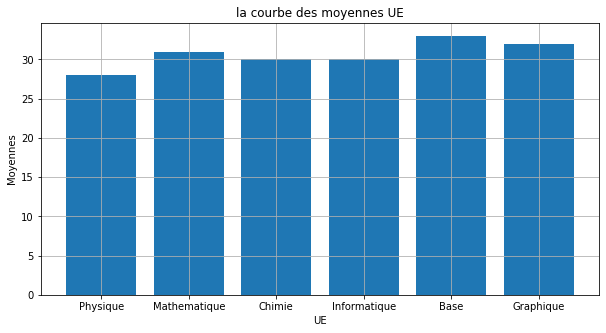

In [20]:
x1 = notes_final.keys()
y1 = valid
fig1, ax1 = plt.subplots(figsize=(10,5)) 
ax1.bar(x1, y1)
plt.title("la courbe des moyennes UE") # Titre de la figure
plt.xlabel("UE") # Label sur l'axe des abscisses
plt.ylabel("Moyennes")
plt.grid()
plt.show()

9. Écrire un programme qui insère la courbe (question 8) dans le fichier de la question 5 en
utilisant une nouvelle feuille.


In [21]:
#courbe de la moyenne annuelle
delibere = result.Book("Deliberation.xlsx")
delibere.sheets.add("Deliberation_Final")
feuille = delibere.sheets("Deliberation_Final")
ax1 = ax1.get_figure()
feuille.pictures.add(ax1, name="Deliberation_Final", update=True)
plt.show()